In [1]:
#1
%matplotlib inline
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from consts import sensor_day_seconds as day_second
from consts import sensor_idd as idd
from consts import sensor_idds_uniq as idds_uniq
from consts import sensor_idds_uniq_sorted as idds_uniq_sorted
from consts import sensor_a_temperature as a_temperature
from consts import sensor_s_temperature as s_temperature
from consts import sensor_unix_column as unix_column
from consts import sensor_idd as idd
epoch_length = 30
import multiprocessing as mp
from multiprocessing import Pool
import time

In [2]:
#2
input_file = open('r_data_files/3_dict_list.pkl','rb')
input_list = pickle.load(input_file)
input_file.close()

In [3]:
#3
# 将epoch epoch_len epoch_time 都flat化
len_list = []
time_stamp_list = []
epoch_list = []
for start_time in input_list:
    # print(len(start_time[0]))
    for dict in start_time[0]:
        len_list.append(len(dict))
        epoch_list.append(dict)
    start_point = start_time[1]
    time_stamps = np.arange(start_point,start_point+day_second+epoch_length,epoch_length)
    time_stamp_list.extend(time_stamps[:-1])
len_array = np.array(len_list)
time_stamp_array = np.array(time_stamp_list) # 时间序列
epoch_array = np.array(epoch_list)

print("len_array_length:{}\ntime_stamp_array_length:{}\nepoch_array_length:{}".format(len(len_array),len(time_stamp_array),len(epoch_array)))

len_array_length:550080
time_stamp_array_length:550080
epoch_array_length:550080
/home/esmidth/.pyenv/versions/miniconda3-4.7.12/envs/ccs_ta/lib/python3.7/site-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


In [4]:
#4
def read_sub_df(start_point):
    time_stamps = np.arange(start_point,start_point+day_second+epoch_length,epoch_length)
    sub_df_list = []
    df = pd.read_hdf('r_data_files/day.h5',str(start_point))
    for i in range(len(time_stamps)-1):
        sub_df = df[(df[unix_column] > time_stamps[i]) & (df[unix_column] <= time_stamps[i+1])]
        sub_df_list.append(sub_df)
    print("Done \t {}".format(start_point))
    return (start_point,sub_df_list)

In [5]:
#5
start_list = np.arange(1162393768,1178747998+day_second,day_second)
manager = mp.Manager()
# aggreateData = manager.dict()
p = Pool(16)
tmp_result = []

for start_point in start_list:
    result = p.apply_async(func=read_sub_df,args=(start_point,))
    tmp_result.append(result)
p.close()
p.join()



Done 	 1162739368
Done 	 1162480168
Done 	 1162652968
Done 	 1162825768
Done 	 1162566568
Done 	 1162393768
Done 	 1163084968
Done 	 1162998568
Done 	 1163516968
Done 	 1163344168Done 	 1162912168
Done 	 1163257768

Done 	 1163171368Done 	 1163430568

Done 	 1163603368
Done 	 1163689768
Done 	 1163776168
Done 	 1163862568
Done 	 1163948968
Done 	 1164035368
Done 	 1164121768
Done 	 1164208168
Done 	 1164294568
Done 	 1164380968
Done 	 1164467368
Done 	 1164553768
Done 	 1164640168
Done 	 1164726568
Done 	 1164812968
Done 	 1164899368
Done 	 1164985768
Done 	 1165072168
Done 	 1165158568
Done 	 1165244968
Done 	 1165331368
Done 	 1165417768
Done 	 1165504168
Done 	 1165590568
Done 	 1165676968
Done 	 1165763368
Done 	 1165849768
Done 	 1165936168
Done 	 1166022568
Done 	 1166108968
Done 	 1166195368
Done 	 1166281768
Done 	 1166368168
Done 	 1166454568
Done 	 1166540968
Done 	 1166627368
Done 	 1166713768
Done 	 1166800168
Done 	 1166886568
Done 	 1166972968
Done 	 1167059368
Done 	 116

In [6]:
#6
origin_time = start_list[0]

results = []
for i in start_list:
    results.append([])

for item in tmp_result:
    temp = item.get()
    results[int((temp[0]-origin_time)/86400)].extend(temp[1])

ddf_list = []
for item in results:
    ddf_list.extend(item)

In [7]:
ddf_list[0]

,Station ID,Year,Month,Day,Hour,Minute,Second,Time since the epoch [s],Sequence Number,Ambient Temperature,Surface Temperature,Relative Humidity [%]
1,23,2006.0,11.0,1.0,16.0,9.0,53.0,1.162394e+09,3575.0,10.22,9.537,53.314
0,17,2006.0,11.0,1.0,16.0,9.0,39.0,1.162394e+09,16957.0,10.21,9.225,49.944
0,26,2006.0,11.0,1.0,16.0,9.0,49.0,1.162394e+09,33559.0,10.03,8.850,51.323
0,14,2006.0,11.0,1.0,16.0,9.0,42.0,1.162394e+09,59093.0,9.98,10.162,49.330
0,46,2006.0,11.0,1.0,16.0,9.0,31.0,1.162394e+09,56096.0,10.12,10.350,53.659
0,8,2006.0,11.0,1.0,16.0,9.0,52.0,1.162394e+09,3696.0,10.02,9.850,50.865
0,35,2006.0,11.0,1.0,16.0,9.0,37.0,1.162394e+09,3507.0,10.24,12.350,52.564


In [7]:
#7
index1 = np.where(len_array > 40)[0]
maybe_array = epoch_array[index1]

In [8]:
#8
# init maybe_dict 
maybe_dict = {}
for i in idds_uniq:
    maybe_dict[i] = 0


for item in maybe_array:
    uniq_item = np.unique(item)
    for j in uniq_item:
        maybe_dict[j] += 1
print(maybe_dict)

{7: 121644, 8: 339835, 11: 342896, 14: 324431, 17: 337239, 19: 322625, 23: 336904, 26: 337590, 27: 81084, 31: 325967, 33: 293570, 34: 347252, 35: 299059, 40: 291577, 46: 343458, 47: 121524, 49: 338187, 51: 347979, 55: 143976, 57: 237378, 59: 232879, 60: 321655, 61: 245086, 62: 282531, 63: 222229, 65: 318670, 69: 210563, 70: 347829, 71: 222339, 72: 332988, 73: 338387, 75: 328271, 76: 341170, 79: 300494, 80: 326850, 81: 277901, 82: 148204, 84: 339446, 87: 346868, 88: 259563, 89: 313535, 93: 332588, 96: 345083, 97: 341440, 98: 244963, 100: 337071, 103: 349764, 104: 345492, 109: 204018, 111: 327948, 121: 325935}


In [9]:
#9
maybe_dict_sorted = sorted(maybe_dict.items(),key=lambda kv:(kv[1],kv[0]),reverse=True)
maybe_dict_sorted = np.array(maybe_dict_sorted)

In [16]:
sub_sensor_list = maybe_dict_sorted.T[0]
print(sub_sensor_list)

In [17]:
sorted(idds_uniq_sorted) == sorted(sub_sensor_list)

In [10]:
#10
# 测试sensor数量为多少合适
def get_sub_index(sensor_count):
    sub_sensor_list = idds_uniq_sorted[:sensor_count]
    sub_index = []
    for i, item in enumerate(epoch_array):
        uniq_item = np.unique(item)
        diff = np.setdiff1d(sub_sensor_list,uniq_item)
        if len(diff) == 0:
            sub_index.append(i)
    return len(sub_index),sub_index

In [11]:
#11 多进程版 
start_time = time.time()
def multi_get_sub_index(i):
    return get_sub_index(i)

sensor_count_list = np.linspace(10,50,41,dtype=int)

manager = mp.Manager()
# aggreateData = manager.dict()
p = Pool(16)
tmp_result = []

for i in sensor_count_list:
    result = p.apply_async(func=multi_get_sub_index,args=(i,))
    tmp_result.append(result)
p.close()
p.join()
print(time.time()-start_time)

78.97445321083069


In [20]:
count = 0
for i,item in enumerate(epoch_array):
    if len(item) != len_array[i]:
        print(i)
    else:
        count += 1
print(count)

In [12]:
#11-1
sub_index_list = []
for item in tmp_result:
    sub_index_list.append(item.get())
sub_index_array = np.array(sub_index_list)

/home/esmidth/.pyenv/versions/miniconda3-4.7.12/envs/ccs_ta/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


In [20]:
i = 10
for item in sub_index_array:
    print(i,item[0])
    i += 1

10 340844
11 326468
12 304287
13 290318
14 278455
15 271503
16 261153
17 252629
18 242449
19 229419
20 202596
21 197581
22 177900
23 170664
24 156007
25 145391
26 134013
27 125057
28 108876
29 96278
30 91528
31 78727
32 59308
33 52306
34 48015
35 46721
36 31360
37 25994
38 24543
39 16421
40 16243
41 14591
42 12453
43 4590
44 4576
45 4573
46 4530
47 2374
48 668
49 0
50 0


In [13]:
#12
def get_length_count(window):
    for item in sub_index_array:
        zeros = np.zeros_like(epoch_array)
        zeros[item[1]] = 1
        sum = 0
        for j in range(len(zeros)):
            tmp = zeros[j:j+window]
            if 0 not in tmp:
                sum += 1
        print(sum)

In [39]:
#13
def get_data_matrixs(sensor_count,window,sub_index_array = None):
    # print(idds_uniq_sorted[:sensor_count])
    tmp = sub_index_array[sensor_count-10][1]
    zeros = np.zeros_like(epoch_array)
    zeros[tmp] = 1

    sum_list = []
    for i in range(len(zeros)):
        tmp1 = zeros[i:i+window]
        if 0 not in tmp1:
            sum_list.append(i)
            
    return sum_list
indices = get_data_matrixs(19,7,sub_index_array)
print(len(indices))

123335


In [53]:
#14
# 丢弃多余帧
def drop_useless_sensor(df,sensor_list):
    # print(sensor_list)
    for i in df[idd].values:
        if i not in sensor_list:
            print('drop:',i)
            df = df[df[idd] != i]
    print('df',len(df))
    print('df:',df[idd].values)
    print(np.sort(sensor_list))
    if len(df) < len(sensor_list):
        return None
    return df
# t = drop_useless_sensor(ddf_list[indices[3]],idds_uniq_sorted[:19])
# print(len(t))

In [ ]:
# before 15, just run it in the first time
for i, df in enumerate(ddf_list):
    with open('r_data_files/data/{}.pkl'.format(i),'wb') as f:
        pickle.dump(df,f)

In [54]:
#15 multi_processing
def multi_convert_df_to_dm(indice_num,sensor_list,window=7):
    # indices = get_data_matrixs(len(sensor_list),window,sub_index_array)
    # print(sensor_list)
    # print(sorted(sensor_list))
    # print(len(sensor_list))
    # indice = indices[indice_num]
    df_list = []
    for i in range(window):
        with open('./data/{}.pkl'.format(indice_num+i),'rb') as f:
            sub_df = pickle.load(f)
        df_list.append(sub_df)
    print(len(df_list))
    return_list = []
    for df in df_list:
        df = df.drop_duplicates(idd)
        # print(df)
        print(np.unique(df[idd].values))
        print(len(np.unique(df[idd].values)))

        print(np.sort(sensor_list))
        print(len(sensor_list))
        df = drop_useless_sensor(df,sensor_list)
        print(df)
        if type(df) == type(None):
            break
        df = df.sort_values(by=idd)
        
        flat_matrix = np.zeros(100)
        # indice_dict = {63:10,23:14,17:15,47:20,7:21,27:22,26:24,14:25,121:26,46:27,8:28,111:32,75:33,57:34,59:35,40:36,34:37,61:41,71:42,65:43,82:45,62:46,76:48,51:51,11:52,70:53,49:54,60:57,84:60,81:61,55:62,72:63,73:64,35:66,31:67,69:68,79:69,103:70,80:71,96:72,97:75,100:76,33:77,19:78,93:79,109:80,87:81,104:84,89:91,88:92,98:94}
        return_list.append(df[s_temperature].values)
    print(len(return_list))
    print(indice_num)
    return np.array(return_list).T
res_array = multi_convert_df_to_dm(97554,idds_uniq_sorted[:21],7)
print(res_array)
print(res_array.shape)

7
[  8  11  14  17  19  23  26  31  33  34  35  40  46  49  51  55  60  69
  70  72  73  76  79  80  81  84  87  88  89  93  96  97  98 100 103 104]
36
[  8  11  17  23  26  34  46  49  51  70  73  75  76  84  87  96  97 100
 103 104 111]
21
drop: 14
drop: 19
drop: 31
drop: 33
drop: 35
drop: 40
drop: 55
drop: 60
drop: 69
drop: 72
drop: 79
drop: 80
drop: 81
drop: 88
drop: 89
drop: 93
drop: 98
df 19
df: [  8  11  17  23  26  34  46  49  51  70  73  76  84  87  96  97 100 103
 104]
[  8  11  17  23  26  34  46  49  51  70  73  75  76  84  87  96  97 100
 103 104 111]
None
0
97554
[]
(0,)


In [ ]:
#16多线程
array_list2 = []
manager = mp.Manager()

p = Pool(16)

start_time = time.time()
def multi_get_sub_index(i):
    return get_sub_index(i)

tmp_result = []

for i in indices:
    result = p.apply_async(func=multi_convert_df_to_dm,args=(i,idds_uniq_sorted[:19],7,))
    tmp_result.append(result)
p.close()
p.join()

for item in tmp_result:
    array_list2.append(item.get())

print(time.time()-start_time)

9627595959

9627696250

9514296571

95961
96274
95962
96572
96570
96569
97118
96573
95960
96853
9711997120

97121
9712697123

9712297127

97130
97125
97129
97176
97128
97132
97131
97124
97177
97371
97192
9734497372

9738097381

97178
97382
97392
9740497403

97405
97406
974089740797409


97413
97411
97412
97415
97414
97410
97417
9742197419

97430
9741697432

97433
97431
97418
97420
97434
97435
97436
9744997437

97451
97450
97511
97514
975139751697517

97515

97512
97518
97519
97520
97530
97529
97528
97531
97540
97533
97535
9753897534

97536
97537
97532
9753997541

97542
97543
9754597544

97546
97554
97555
97564
9756597556

9756797566

97569
97570
97568
97572
97571
97574
97575
97573
97576
97578
97581
97579
97577
97590
97589
9759297580

9759197594

97593
97595
9759697597

97599
97600
97602
97604
97601
97598
97603
97605
97606
97608
97609
976109760797611


97612
97613
97615
97614
9761697617

97618
97619
97621
97620
97622
97623
97624
97626
97625
97627
97635
97636
97644
97829
97830
97848
9784

105189
105203
105191
105204
105205
105206
105207
105208
105209
105210
105211
105212
105213
105231
105232
105234
105242
105233
105243
105244
105245
105257
105272
105273
105274
105275
105276
105277
105278
105279
105327
105328
105329
105330
105331
105332
105383
105384
105393
105392
105394
105397
105396
105395
105398
105399
105400
105401
105402
105404
105403
105412
105413
105462
105461
105463
105495
105496
105497
105602
105603
105604
105622
105630
105631
105632
105753
105952
105953
105954
105955
105956
105957
105958
105959
105960
105969
105970
105971
105972
105973
105974
105990
105991
105992
105993105994

105995
105996
105998
105997
105999
106000
106012
106042
106045
106043
106044
106046
106047
106048
106051
106050
106049
106106
106114
106115
106182
106183
106217
106291
106293
106292
106294
106342
106295
106426
106491106427

106492
106715
114668
114669
114670
114671
114673
114672
114675
114674
114676
114677
114678
114679
114688
114680
114689
114691
114690
114692
114693
114694
114695
114696

116622
116623
116624
116625
116626
116627
116628
116629
116630
116631
116639
116640
116641
116642
116643
116652
116651
116653
116654
116656
116657
116655
116658
116659
116660
116661
116662
116663
116664
116665
116667
116666
116668
116669
116670
116671
116672
116673
116674
116676
116675
116677
116678
116679
116680
116681
116682
116683
116684
116685
116686
116688116689

116687
116690
116691
116692
116693
116694
116695
116697
116696
116699
116700
116698
116701
116702
116703
116705
116704
116706
116707
116708
116709
116710
116711
116719
116720
116721
116731116723

116722
116732
116735116734

116733
116736
116737
116738
116739
116740
116741
116743116742

116744
116747
116745
116748
116746
116749
116751
116750
116752
116753
116754
116755
116756
116757
116759
116758
116760
116762116764

116763
116761
116765
116766
116768
116767
116769
116770
116778
116788
116789
116790
116798
116799
116800116802

116801
116803
116837
116804
116838116839

116840
116841
116842
116844
116843
116845
116846
116847

119156
119158
119157
119159
119160
119162
119171
119161
119163
119172
119173
119174
119175
119176
119178
119177
119179
119180
119181
119182
119183
119184
119196
119194
119195
119197
119200
119198
119199
119201
119202
119203
119204
119206
119205
119207
119208
119209
119211
119212
119210
119213
119214
119216119215

119217
119218
119219
119220
119222
119223
119221
119224
119225
119226
119228
119227
119229
119230
119231
119232
119233
119234
119235
119236
119238119239

119237
119240
119241
119242
119243
119244
119245
119247
119263
119246
119264
119265
119266
119267
119268
119269
119286
119287
119288
119289
119290
119291
119292
119293
119294
119295
119296
119297
119298
119299
119301
119300119302

119303
119304
119305
119306
119308
119307
119309
119310
119311
119312
119320
119321
119322
119323
119324
119325
119326
119335
119336119337

119338
119339
119340
119341
119422
119423
119424
119425
119426
119427
119428
119429
119446
119445
119448119447

119449
119450
119451
119452
119454
119453
119455

122600
122592
122601
122591
122602
122603
122604
122606
122605
122607
122608
122609
122610
122611
122612
122613
122616
122615
122614
122617
122618
122620
122619
122621
122622
122624122623

122626
122625
122627
122628
122629
122630
122631
122632
122640
122641
122642
122643
122644
122645
122646
122647
122649
122648
122650
122651
122652
122653
122654
122655
122656
122657
122659
122658
122661
122660
122663122662

122665
122664
122666
122667
122668
122676
122678
122677
122679
122680
122690
122691
122694
122693
122692
122695
122696
122697
122698
122699
122700
122701
122703
122702
122704
122705
122706
122707
122708
122710
122711
122709
122713
122712
122714
122715
122716
122717
122719122718

122721
122762
122720
122763
122771
122772
122781
122773
122782
122783
122791
122792
122793
122794
122796
122795
122797
122799
122798
122800
122802
122801
122803
122804
122805
122806
122807
122808
122809
122810
122811
122812
122813
122814
122832
122815
122833
122834
122837
122836
122835
122846
122847
122848

## There are some bugs in time stamp, repairing it later

In [97]:
time_stamp_array_new = np.arange(1162393768,1178747998+day_second*2+epoch_length,epoch_length)
print(len(time_stamp_array_new))

550902


In [102]:
len(time_stamp_array_new)-len(time_stamp_array)

822

In [98]:
time_stamp_diff = np.setdiff1d(time_stamp_array,time_stamp_array_new)

In [99]:
diff_indices = []
for i,diff in enumerate(time_stamp_diff):
    diff_indices.append(np.where(time_stamp_array == diff)[0][0])
print(len(diff_indices) == len(time_stamp_diff))
print(len(diff_indices))

True
0


In [100]:
zz = np.zeros_like(time_stamp_array)
zz[diff_indices] = 1

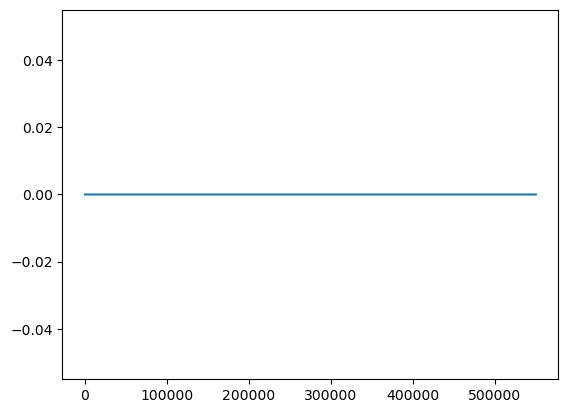

In [101]:
plt.plot(zz)